In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'cmr10'
plt.rcParams['font.size'] = 10
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.formatter.use_mathtext'] = True

# plt.figure(figsize=(4.9, 3.5))

In [30]:
# Function for loading data
def load(file: str):
    data = pd.read_csv(file)
    data["command"] = data["command"].str.slice(0, -2)
    data["command"] = pd.to_numeric(data["command"])
    times = data["mean"]
    # check first letter of file
    if file[0] == "h":
        O0 = "Haskell"
        O3 = "Haskell -O3"
    elif file[0] == "c":
        O0 = "C"
        O3 = "C -O3"
    else:
        O0 = "Project"
        O3 = "Project -O3"
    
    if len(times) == 2:
        data[O0] = times[0]
        data[O3] = times[1]
    else:
        data[O0] = np.nan
        data[O3] = times[0]
    return data.iloc[0:1][["command", O0, O3]]

          Project  Project -O3
command                       
40       0.712615     0.206505
41       1.152012     0.332953
42       1.866901     0.534611
43       3.019058     0.860023
44       4.870766     1.388606
45       7.877620     2.249570
                C     C -O3
command                    
40       0.428082  0.205595
41       0.704660  0.335310
42       1.111906  0.531685
43       1.804058  0.874287
44       2.924881  1.388465
45       4.767316  2.261946
            Haskell  Haskell -O3
command                         
40         3.724217     0.366685
41        15.184488     0.593336
42        24.552565     0.952574
43        39.582231     1.533951
44        64.311513     2.486238
45       104.190379     4.043792


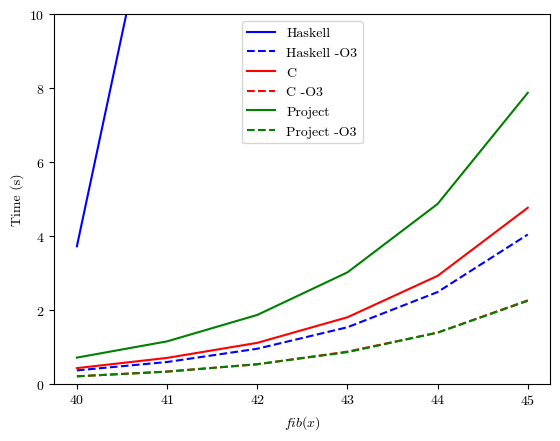

In [32]:
c_times = pd.concat([
    load("c40.csv"),
    load("c41.csv"),
    load("c42.csv"),
    load("c43.csv"),
    load("c44.csv"),
    load("c45.csv"),
], ignore_index=True)
c_times.set_index("command", inplace=True)

haskell_times = pd.concat([
    load("h40.csv"),
    load("h41.csv"),
    load("h42.csv"),
    load("h43.csv"),
    load("h44.csv"),
    load("h45.csv"),
], ignore_index=True)
haskell_times.set_index("command", inplace=True)

my_times = pd.concat([
    load("p40.csv"),
    load("p41.csv"),
    load("p42.csv"),
    load("p43.csv"),
    load("p44.csv"),
    load("p45.csv"),
], ignore_index=True)
my_times.set_index("command", inplace=True)

ax = haskell_times.plot(style=['b', 'b--'])
ax = c_times.plot(ax=ax, style=['r', 'r--'])
my_times.plot(ax=ax, style=['g', 'g--'],)

print(my_times)
print(c_times)
print(haskell_times)

plt.ylim(0, 10)
plt.xlabel("$fib(x)$")
plt.ylabel("Time (s)")
plt.savefig("fibonacci-benchmark.pdf", bbox_inches='tight')